### Regularization Techniques

The purpose of Regularization techniques is to reduce the degree of overfitting that can occur in Regression models.

In this lab, we will cover three types of regularizers:

- Ridge regression
- Lasso regression
- Elastic Net

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale, StandardScaler, minmax_scale
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import warnings

%matplotlib inline
def warn(*args, **kwargs):
    pass
warnings.warn = warn

### Sales dataset - sales price.

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/encoded_car_data.csv')
df.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

In [4]:
def plot_dist(y,yhat):
    sns.kdeplot(y, color='r', label='Actual Value')
    sns.kdeplot(yhat, color='b', label='Fitted Value')

    plt.legend()
    plt.title('Actual vs Fited Values')
    plt.xlabel('Price USD')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [5]:
def plot_coef(X,model,name=None):
    

    plt.bar(X.columns[2:],abs(model.coef_[2:]))
    plt.xticks(rotation=90)
    plt.ylabel("$coefficients$")
    plt.title(name)
    plt.show()
    print("R^2 on training  data ",model.score(X_train, y_train))
    print("R^2 on testing data ",model.score(X_test,y_test))

### Data Preparation

In [6]:
#Let's first split our data into X features and Y target
X = df.drop('price', axis=1)
y = df.price

# split our data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [7]:
print(f'Number of test samples: {X_test.shape[0]}')
print(f'Number of traiining samples: {X_train.shape[0]}')

Number of test samples: 21
Number of traiining samples: 184


### Linear regression

In [8]:
#Let's create a LinearRegression object
lm = LinearRegression()

# Now, let's fit the model with multiple features on our X_train and y_train df
lm.fit(X_train,y_train)

#We apply predict() function on testing data set
predicted = lm.predict(X_test)

In [9]:
#Let's calculate the R² on both, training and testing df sets
print(f'R² on training data {lm.score(X_train, y_train)}')
print(f'R² on testing data {lm.score(X_test, y_test)}')

R² on training data 0.9076221268212092
R² on testing data 0.9453240980019393


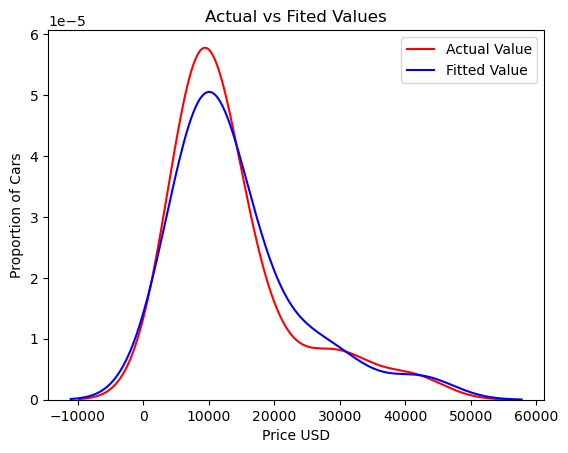

In [10]:
# We can plot a distribution of the predicted values vs the actual values.
plot_dist(y_test, predicted)

We can view the estimated coefficients for the linear regression problem and drop the top two coefficients, as they are two large.

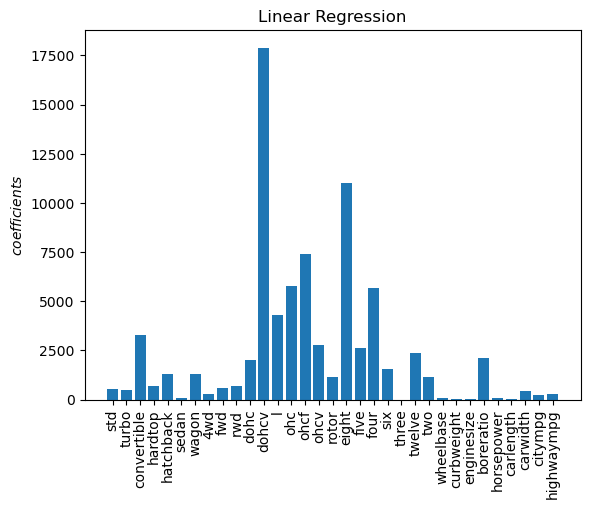

R^2 on training  data  0.9076221268212092
R^2 on testing data  0.9453240980019393


In [11]:
plot_coef(X, lm, name='Linear Regression')

### Ridge Regression

In [12]:
# Let's create a Ridge Regression object, setting the regularization parameter (alpha = 0.01)
rr = Ridge(alpha=0.01)

# Like regular regression, you can fit model using the fit() method
rr.fit(X_train, y_train)

#predict
rr.predict(X_test)

array([30178.77172992, 22179.93145434, 11229.58960483, 11790.40337149,
       26348.13785546,  5439.13547145,  9054.02541015,  7265.36558563,
       10591.48456189, 10390.82134687, 17471.12024994,  7010.47430228,
       16547.06078383, 10468.27937016, 41540.38102791,  5390.34659152,
        5109.76377303, 15373.1930261 , 10703.56615831, 11448.33242702,
       10565.49269055])

In [13]:
# We can calculate the R² on the training and testing data
print(f'R² on training data: {rr.score(X_train, y_train)}')
print(f'R² on testing data: {rr.score(X_test, y_test)}')

R² on training data: 0.9091956531801181
R² on testing data: 0.9478784615596502


R^2 on training  data Linear Regression:  0.9076221268212092
R^2 on testing data Linear Regression:  0.9453240980019393


R^2 on training  data Ridge Regression: 0.9091956531801181
R^2 on testing data Ridge Regression: 0.9478784615596502


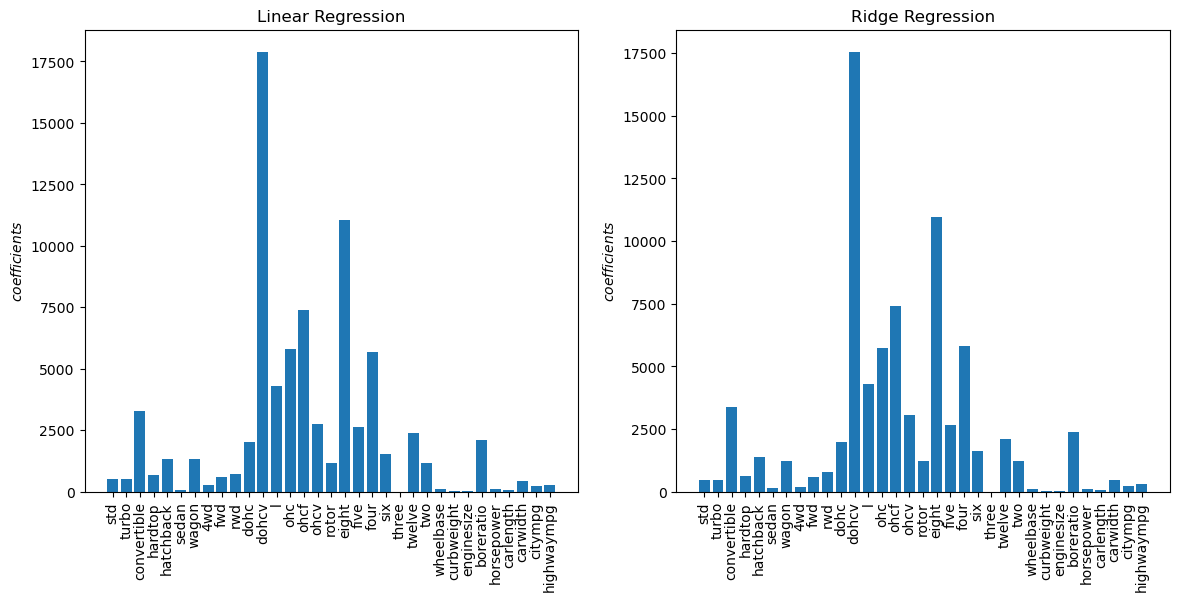

In [14]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
axes = axes.flatten()

# Linear Regression 
axes[0].bar(X.columns[2:],abs(lm.coef_[2:]))
axes[0].set_xticklabels(X.columns[2:], rotation=90)
axes[0].set_ylabel("$coefficients$")
axes[0].set_title('Linear Regression')
print("R^2 on training  data Linear Regression: ",lm.score(X_train, y_train))
print("R^2 on testing data Linear Regression: ",lm.score(X_test,y_test))
print('\n')

axes[1].bar(X.columns[2:],abs(rr.coef_[2:]))
axes[1].set_xticklabels(X.columns[2:], rotation=90)
axes[1].set_ylabel("$coefficients$")
axes[1].set_title('Ridge Regression')
print("R^2 on training  data Ridge Regression:",rr.score(X_train, y_train))
print("R^2 on testing data Ridge Regression:",rr.score(X_test,y_test))

plt.show()

If we increase alpha, the coefficients get smaller, but the results are not as good as our previous value of alpha.

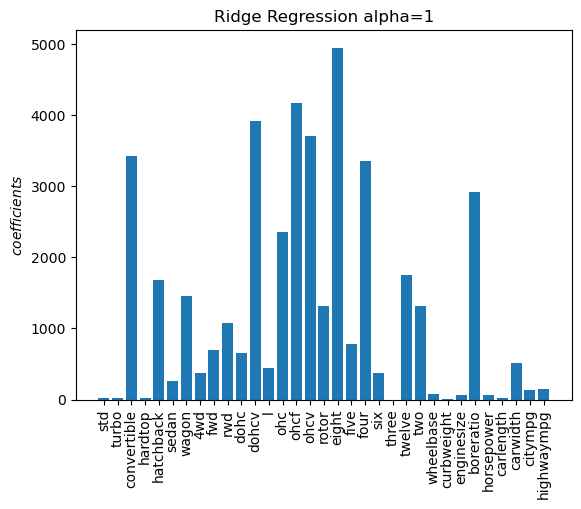

R^2 on training  data  0.8991374778636108
R^2 on testing data  0.9446031107273961


In [15]:
rr = Ridge(alpha=1)
rr.fit(X_train, y_train)
plot_coef(X,rr, 'Ridge Regression alpha=1')


In general, we see that if we increase alpha, the coefficients get smaller, but the model performance relationship gets more complex. As a result, we use the validation data to select a value for alpha. Here, we plot the coefficients and R² of the test data on the vertical axes and alpha on the horizontal axis, as well the R² using the test data.

In [16]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
R_2 = []
coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(abs(ridge.coef_))
    R_2.append(ridge.score(X_test, y_test))

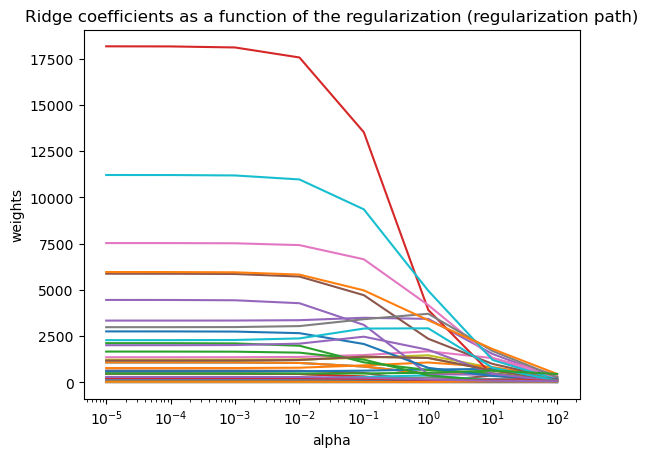

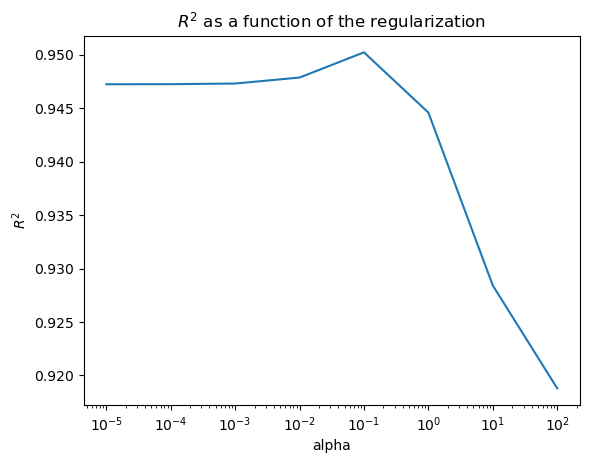

In [17]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.show()  

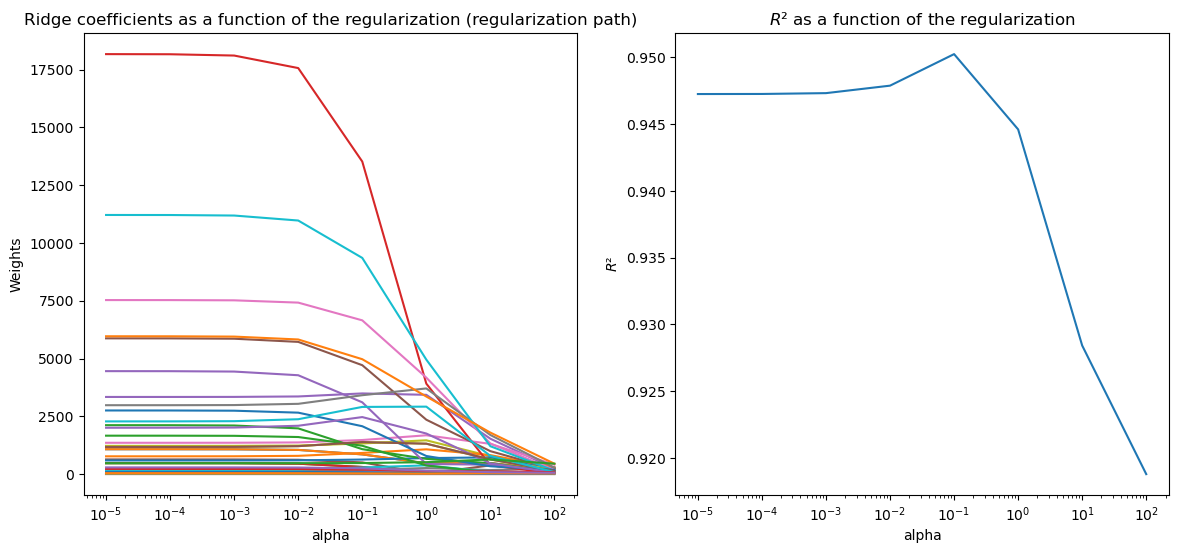

In [18]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
axes = axes.flatten()

# Ridge coefficients
axes[0].plot(alphas, coefs)
axes[0].set_xscale('log')
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('Weights')
axes[0].set_title('Ridge coefficients as a function of the regularization (regularization path)')

# r²

axes[1].plot(alphas, R_2)
axes[1].set_xscale('log')
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('$R²$')
axes[1].set_title('$R²$ as a function of the regularization')
plt.show()

As we increase alpha, the coefficients get smaller but the R² peaks when alpha is 1.

plot the MSE as a function of alpha.

In [19]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10]
MEAN_SQE = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    MEAN_SQE.append(mean_squared_error(ridge.predict(X_test), y_test))

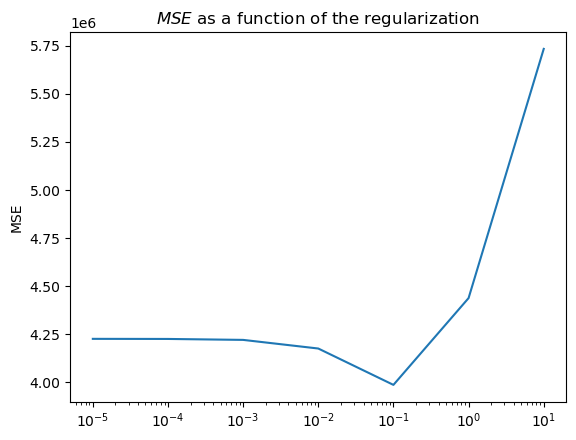

In [20]:
plt.plot(alphas, MEAN_SQE)
plt.xscale('log')
plt.ylabel('alpha')
plt.ylabel('MSE')
plt.title('$MSE$ as a function of the regularization')
plt.show()

A small alpha leads to over-fitting but as alpha gets larger the MSE decreases. When alpha gets too large the MSE increases leading to underfitting. The optimal point seems to be in the middle .



### Pipeline

In [21]:
input = [('polynomial', PolynomialFeatures(include_bias=False, degree=2)),
         ('ss', StandardScaler()),
         ('model', Ridge(alpha=1))]

pipe = Pipeline(input)

pipe.fit(X_train, y_train)

# We can calculate the score on the test data
predicted = pipe.predict(X_test)
pipe.score(X_test, y_test)

0.9075262214621718

Looking for hyperparameters can get difficult with loops. The problem will get worse as we add more transforms such as polynomial transform. Therefore, we can use GridSearchCV to make things simpler.

### GridSearchCV

In [22]:
param_grid = {'polynomial__degree': [1,2,3,4],
              'model__alpha':[0.0001,0.001,0.01,0.1,1,10]}

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
search

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3, 4]})

In [23]:
print('best_score_:', search.best_score_)
print('best_params_:', search.best_params_)

best_score_: 0.8681282282391249
best_params_: {'model__alpha': 10, 'polynomial__degree': 2}


In [24]:
predict = search.predict(X_test)
predict

array([34464.68303015, 23419.34979609,  9723.38208924, 13433.42551625,
       25239.67969507,  6532.54733115,  7468.55986929,  7687.50892226,
        9114.59988701,  9541.72323357, 15453.55023026,  6815.64031583,
       16958.71711106, 10290.1730189 , 42072.30176794,  6356.53352923,
        1536.17210277, 13705.75183086,  9758.24171738,  9210.40054167,
        9999.70716056])

In [25]:
best = search.best_estimator_
best

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=10))])

As we can see from the above output, it is five degree polynomial with alpha value of 0.0001. Now, let's make a prediction.

In [26]:
predict = best.predict(X_test)
predict

array([34464.68303015, 23419.34979609,  9723.38208924, 13433.42551625,
       25239.67969507,  6532.54733115,  7468.55986929,  7687.50892226,
        9114.59988701,  9541.72323357, 15453.55023026,  6815.64031583,
       16958.71711106, 10290.1730189 , 42072.30176794,  6356.53352923,
        1536.17210277, 13705.75183086,  9758.24171738,  9210.40054167,
        9999.70716056])

We can calculate the R² on the test data.

In [27]:
best.score(X_test, y_test)

0.9441203657848708

As we see, using Ridge Regression polynomial function works better than all other models. Finely, we can train our model on the entire data set!

In [28]:
best.fit(X,y)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=10))])

Perform grid search on the following features and plot the results by completing the following lines of code:

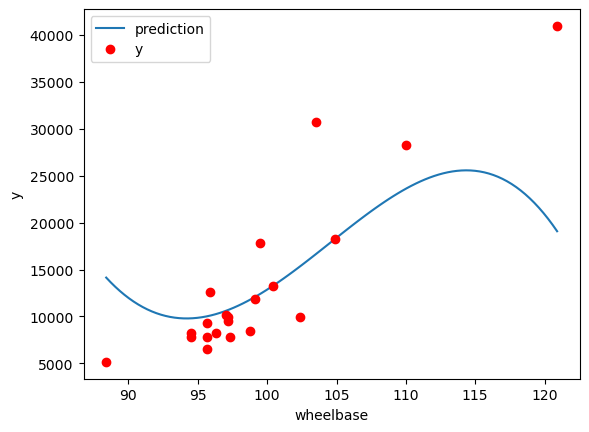

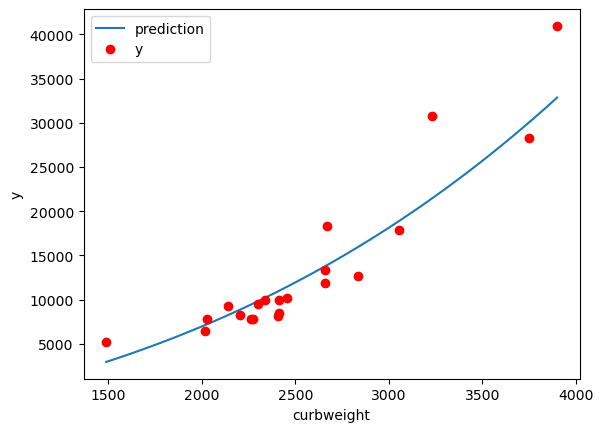

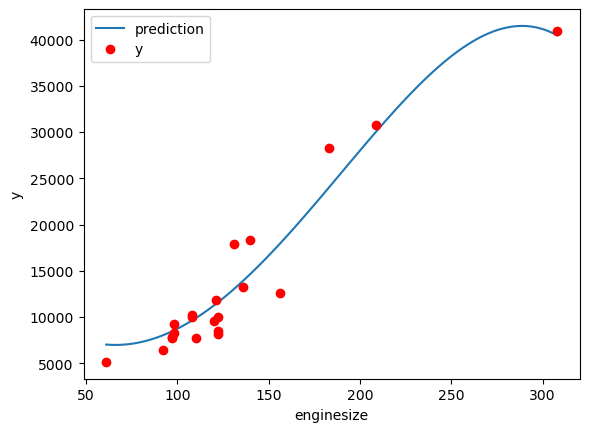

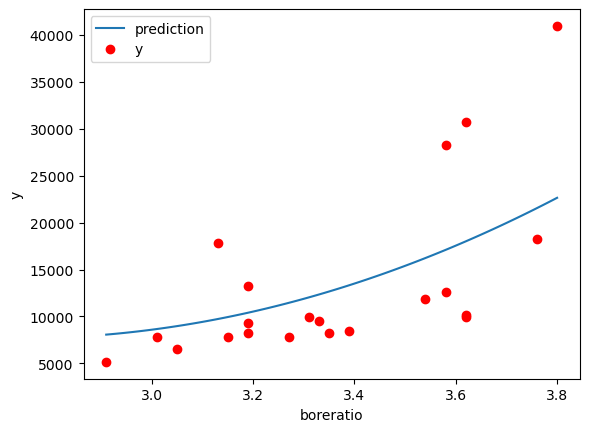

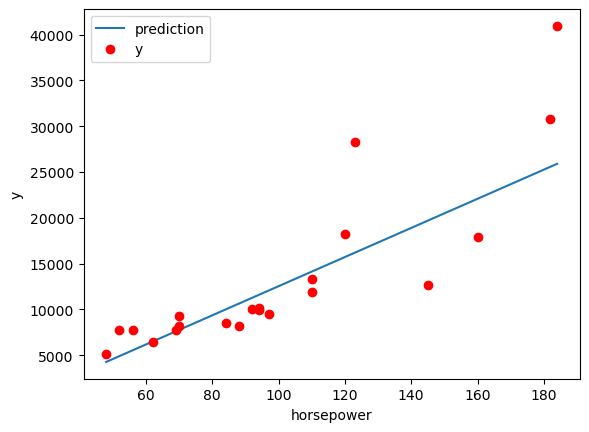

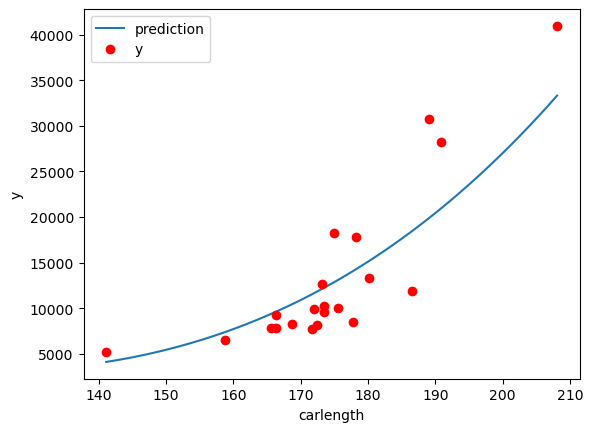

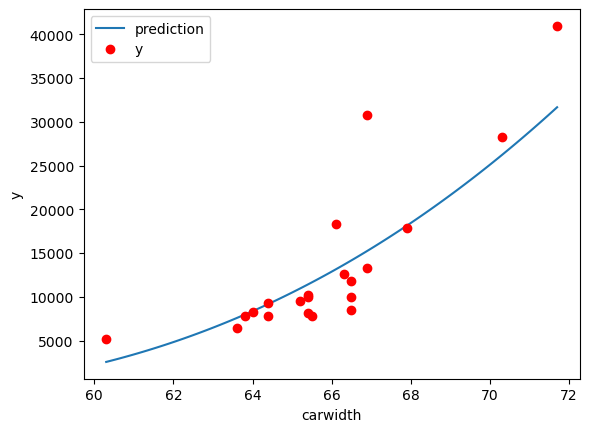

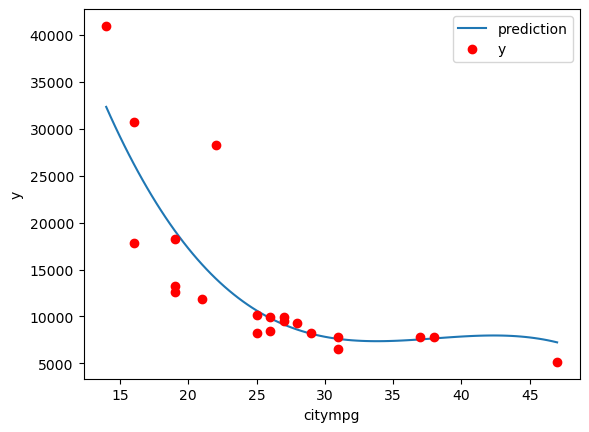

In [ ]:
columns=['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'carlength', 'carwidth', 'citympg']

for column in columns:
    search.fit(X_train[[column]], y_train)
    x = np.linspace(X_test[[column]].min(), X_test[[column]].max(), num=100)
    plt.plot(x,search.predict(x.reshape(-1,1)),label='prediction')
    plt.plot(X_test[column], y_test, 'ro', label='y')
    plt.xlabel(column)
    plt.ylabel('y')
    plt.legend()
    plt.show()

### Lasso Regression

In [33]:
la = Lasso(alpha=0.1)
la.fit(X_train,y_train)

#Let's make a prediction
predicted = la.predict(X_test)

Let's calculate the R² on the training and testing data and see how it performs compared to the other methods.

In [36]:
print('R² on training data: ', la.score(X_train, y_train))
print('R² on testing data: ', la.score(X_test, y_test))

R² on training data:  0.9092098726971481
R² on testing data:  0.945325886907799


R^2 on training  data Ridge Regression:  0.8991374778636108
R^2 on testing data Ridge Regression:  0.9446031107273961


R^2 on training  data Lasso Regression: 0.9092098726971481
R^2 on testing data Lasso Regression: 0.945325886907799


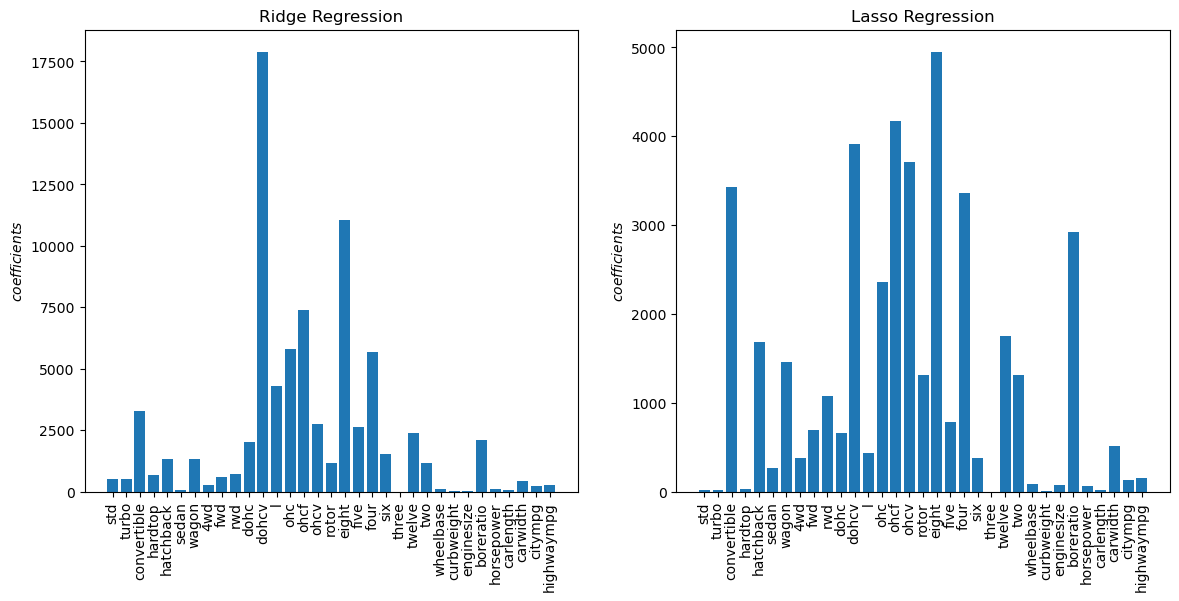

In [35]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
axes = axes.flatten()

# Linear Regression 
axes[0].bar(X.columns[2:],abs(lm.coef_[2:]))
axes[0].set_xticklabels(X.columns[2:], rotation=90)
axes[0].set_ylabel("$coefficients$")
axes[0].set_title('Ridge Regression')
print("R^2 on training  data Ridge Regression: ",rr.score(X_train, y_train))
print("R^2 on testing data Ridge Regression: ",rr.score(X_test,y_test))
print('\n')

axes[1].bar(X.columns[2:],abs(rr.coef_[2:]))
axes[1].set_xticklabels(X.columns[2:], rotation=90)
axes[1].set_ylabel("$coefficients$")
axes[1].set_title('Lasso Regression')
print("R^2 on training  data Lasso Regression:",la.score(X_train, y_train))
print("R^2 on testing data Lasso Regression:",la.score(X_test,y_test))

plt.show()

Similar to the Ridge Regression, if we increase the value of alpha, the coefficients will get smaller. Additionally, many coefficients become zero. Moreover, the model performance relationship becomes more complex. As a result, we use the validation data to select a value for alpha. Here, we plot the coefficients and 
 of the test data on the vertical axes and alpha values on the horizontal axis.

In [37]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
R_2 = []
coefs = []

for alpha in alphas:
    la = Lasso(alpha=alpha)
    la.fit(X_train, y_train)
    coefs.append(abs(la.coef_))
    R_2.append(la.score(X_test,y_test))

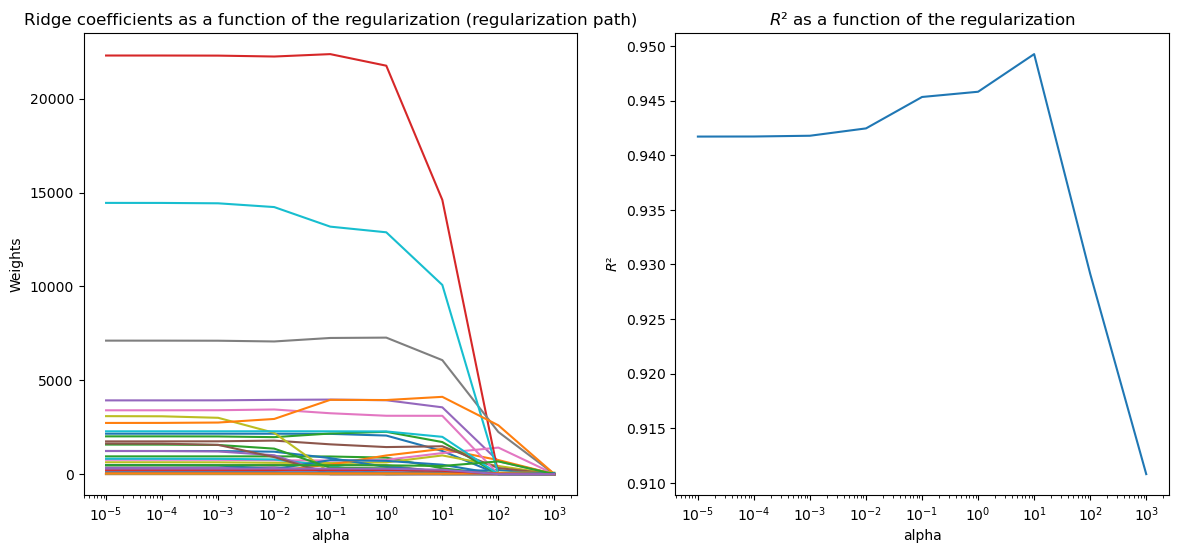

In [38]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
axes = axes.flatten()

# Ridge coefficients
axes[0].plot(alphas, coefs)
axes[0].set_xscale('log')
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('Weights')
axes[0].set_title('Ridge coefficients as a function of the regularization (regularization path)')

# r²

axes[1].plot(alphas, R_2)
axes[1].set_xscale('log')
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('$R²$')
axes[1].set_title('$R²$ as a function of the regularization')
plt.show()

### Pipeline 

In [39]:
input = [('polynomial', PolynomialFeatures(include_bias=False, degree=2)),
         ('ss', StandardScaler()),
         ('model', Lasso(alpha=1, tol=0.2))]

pipe = Pipeline(input)

pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([31090.35502413, 23135.62504126,  9457.4650858 , 11222.64465089,
       28503.13820242,  6821.35081552,  7716.68381925,  7436.33736593,
        7805.79226801, 10151.89082851, 16262.8074276 ,  8278.75257849,
       16684.95563795, 10658.46233607, 38313.26144272,  7039.4378737 ,
        8259.35558463, 12989.37400724,  9251.96079447,  8253.92933959,
        9674.77573004])

In [40]:
print('R² on training data: ', pipe.score(X_train, y_train))
print('R² on test data: ', pipe.score(X_test, y_test))

R² on training data:  0.941181185417151
R² on test data:  0.953382982655632


As we see, some individual features perform similarly to using all the features (we removed the feature three ). Additionally, we see the smaller coefficients seem to correspond to a larger R², therefore larger coefficients correspond to overfiting.

### GridSearchCV

In [43]:
param_grid = {'polynomial__degree': [1,2,3,4,5],
              'model__alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10]}

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)

#Now, we can find the best model
best = search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ss', StandardScaler()), ('model', Lasso(alpha=10, tol=0.2))])

In [44]:
# We can calculate the R² on the test data
best.score(X_test, y_test)

0.9390483610147887